In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

# Load the dataset
df = pd.read_csv('lung cancer severity prediction.csv')

# Correlation Heatmap of Risk Factors and Lung Cancer Severity

This heatmap reveals the correlations between various risk factors and lung cancer severity. Notably, Alcohol Use (0.72), Dust Allergy (0.71), and Passive Smoker (0.70) show the strongest positive correlations, suggesting these factors play a significant role in determining Lung Cancer severity level. Moderate correlations are observed with Occupational Hazards (0.67), Air Pollution (0.64), and Fatigue (0.63), indicating their importance as well.

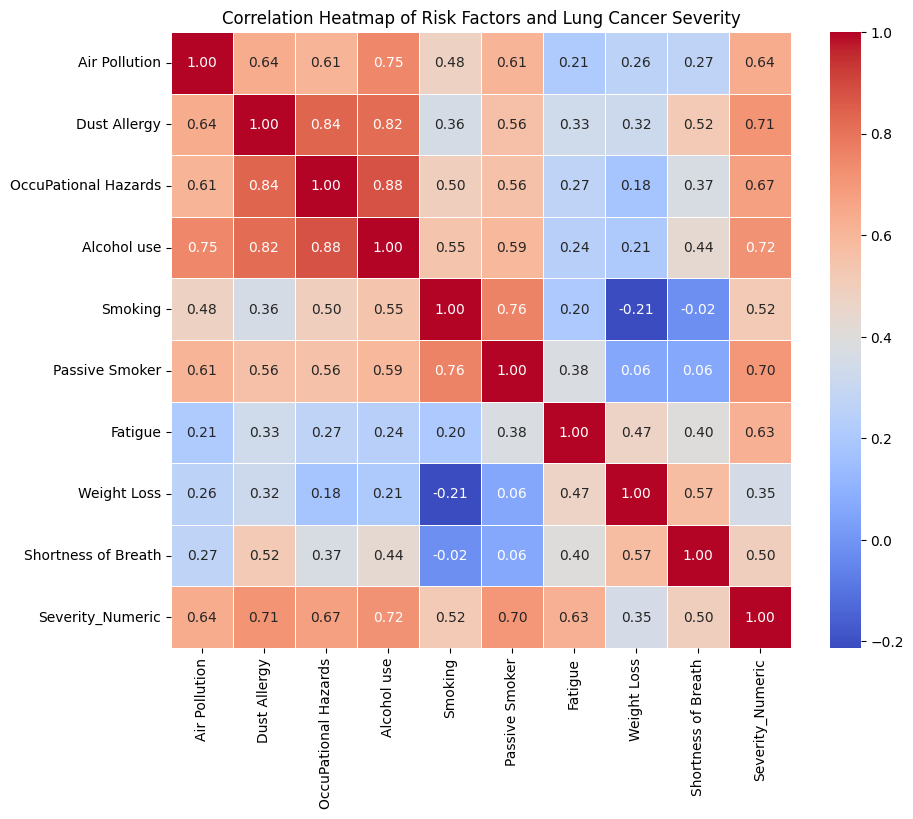

In [42]:
# Low, Medium, High Severity Levels
severity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Severity_Numeric'] = df['Level'].map(severity_mapping)

# Selecting 10 relevant columns for correlation
risk_factors = ['Air Pollution', 'Dust Allergy', 'OccuPational Hazards', 'Alcohol use', 'Smoking', 'Passive Smoker', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Severity_Numeric']

# Correlation matrix
correlation_matrix = df[risk_factors].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Risk Factors and Lung Cancer Severity')
plt.show()

# Average Symptom Severity by Lung Cancer Level

This stacked bar chart visualization depicts the average severity scores of symptoms (Fatigue, Shortness of Breath, Chest Pain, and Coughing of Blood) across different lung cancer levels (High, Medium, Low). Patients with higher severity levels tend to experience all symptoms at greater intensities, with "Coughing of Blood" and "Chest Pain" being notably more prominent in the High severity group.

Here, we can also see how shortness of breath stands out as a prominent symptom even in the Low severity group, indicating that it may be an early indicator of lung cancer regardless of severity level.

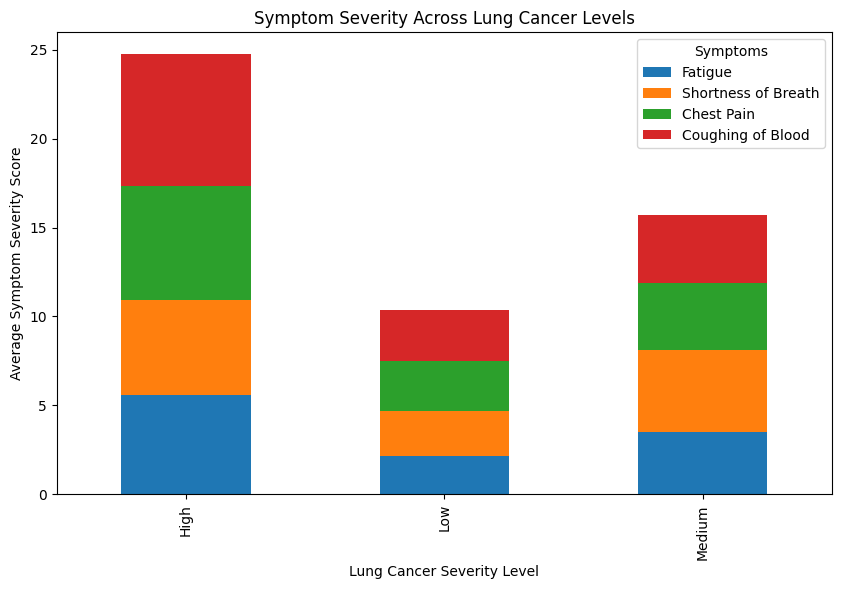

In [43]:
symptoms = ['Fatigue', 'Shortness of Breath', 'Chest Pain', 'Coughing of Blood']

# Group data by severity level and sum of symptom scores
severity_symptom_data = df.groupby('Level')[symptoms].mean()

# Plotting stacked bar chart
severity_symptom_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Symptom Severity Across Lung Cancer Levels')
plt.xlabel('Lung Cancer Severity Level')
plt.ylabel('Average Symptom Severity Score')
plt.legend(title='Symptoms')
plt.show()

In [51]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [52]:
# Get the shape of the data (rows, columns)
total_observations, total_variables = df.shape
print(f"Total Observations: {total_observations}")
print(f"Total Variables: {total_variables}")

# Display column names (variables)
print("Variables:", df.columns.tolist())

# Get a statistical summary of the data
df.describe()


Total Observations: 1000
Total Variables: 26
Variables: ['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [53]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [54]:
# Get info about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Recursive Feature Elimination

In [55]:
X = df.drop(columns=['Level', 'Patient Id', 'index'])  # Remove non-informative columns and target column
y = df['Level']
y = y.map({"Low": 0, "Medium": 1, "High": 2})
#We're removing the target column (Level) from the feature set (X) because it is the variable we are trying to predict. In machine learning, when preparing data for training a model, we separate the features (independent variables) from the target (dependent variable) to avoid data leakage, which can lead to overly optimistic performance metrics and incorrect predictions.

In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize the linear regression model
model = LinearRegression()

In [58]:
# Set up Recursive Feature Elimination (RFE)
# We choose a number of features to select, let's say 10, which you can adjust
selector = RFE(model, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

In [59]:
# Get the selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Air Pollution', 'Genetic Risk', 'Balanced Diet',
       'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
       'Swallowing Difficulty', 'Snoring'],
      dtype='object')


In [60]:
# Filter training and testing data to only include selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [61]:
# Fit linear regression with the selected features
model.fit(X_train_selected, y_train)

LinearRegression()

In [62]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_selected)

In [63]:
# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.056075436252308285
R-squared: 0.915900511788372


In [64]:
# Print coefficients for each selected feature
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print("\nCoefficients of Selected Features:\n", coefficients)


Coefficients of Selected Features:
                  Feature  Coefficient
0                 Gender     0.110932
1          Air Pollution     0.075318
2           Genetic Risk     0.157188
3          Balanced Diet     0.036479
4             Chest Pain    -0.079374
5      Coughing of Blood     0.100992
6                Fatigue     0.071859
7    Shortness of Breath     0.072413
8  Swallowing Difficulty     0.087904
9                Snoring     0.136315


## Random Forest Classifier

In [66]:
X = df[selected_features]
X

,Gender,Air Pollution,Genetic Risk,Balanced Diet,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Swallowing Difficulty,Snoring
0,1,2,3,2,2,4,3,2,3,4
1,1,3,4,2,2,3,1,7,6,2
2,1,4,5,6,4,8,8,9,1,2
3,1,7,6,7,7,8,4,3,4,5
4,1,6,7,7,7,9,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...
995,1,6,7,7,7,7,5,2,8,3
996,2,6,7,7,7,7,9,5,2,4
997,2,4,5,6,4,8,8,9,1,2
998,2,6,7,7,7,9,3,4,4,3


In [67]:
Y = df.iloc[:,25]
Y

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
max_depth = [5, 10, 15, 20, 30, None]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

rf_Grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
rf_Grid.fit(X_train,Y_train)
rf_Grid.best_params_

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


/Users/hpanh/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'bootstrap': True,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 42}

In [77]:
rf_Model = RandomForestClassifier(n_estimators=42,
                                  min_samples_split=2,
                                  max_depth=5,
                                  min_samples_leaf=1,
                                  bootstrap=True,
                                  random_state=27)
rf_Model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=42, random_state=27)

In [78]:
Y_pred = rf_Model.predict(X_test)

In [79]:
rf_Model.score(X_test, Y_test)

1.0

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        67
         Low       1.00      1.00      1.00        62
      Medium       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

